In [1]:
import requests
import csv
import pandas as pd
from omdbapi.movie_search import GetMovie
import matplotlib.pyplot as plt
import numpy as np

In [2]:
oscar_winners = pd.read_csv('oscar_winners.csv')
oscar_winners.head(2)

,Movie,IMDB
0,Parasite,tt6751668
1,Green Book,tt6966692


In [3]:
Key_Api = '4a5dc06e'

In [4]:
# Read file 'oscar_winners.csv' file
oscar_winners = pd.read_csv(r"oscar_winners.csv")
Column_Name = ['Movie Title', 'Runtime', 'Genre', 'Award Wins', 'Award Nominations', 'Box Office', 'Director', 'Plot', 'DVD']

All_Data_Rows_List = []

for id in oscar_winners['IMDB']:
    rows_list = []
    data = requests.get(f"http://www.omdbapi.com/?apikey={Key_Api}&i={id}").json() #data is in form of dictionary datatype
    Title = rows_list.append(data['Title']) #when append, it will return array of values sorted
    Runtime = rows_list.append(data['Runtime'].split()[0])
    Genre = rows_list.append(data['Genre'])
    Award_Wins = rows_list.append(data['Awards'].split()[3])
    Award_Nominations = rows_list.append((data['Awards'].split()[6]))
    Box_Office = rows_list.append(data['BoxOffice'])
    # Additional columns
    Director = rows_list.append(data['Director'])
    Plot = rows_list.append(data['Plot'])
    Dvd = rows_list.append(data['DVD'])
    #Append to All_Data_Rows_List
    All_Data_Rows_List.append(rows_list)


In [5]:
# Maybe you need to turn off Window Defender or change local file path to run this code below
file_path = r'oscar_winners.csv'

with open("New_Movies.csv",'w') as f:
    writer = csv.writer(f)
    writer.writerow(Column_Name)
    for movie in All_Data_Rows_List:
        writer.writerow(movie)

The above code can be stored in a separated code source file to ensure the safety of security, as it contains the API key, which can easily be manipulated by other people if not secured secretly.

---

In [6]:
movie = pd.read_csv("New_Movies.csv", encoding = 'latin-1')
movie['Box Office'] = movie['Box Office'].replace("[$,]", "", regex = True).astype('int64') #total profit
movie['DVD'] = pd.to_datetime(movie['DVD'])
movie.head(5)


,Movie Title,Runtime,Genre,Award Wins,Award Nominations,Box Office,Director,Plot,DVD
0,Parasite,132,"Drama, Thriller",306,264,53369749,Bong Joon Ho,Greed and class discrimination threaten the ne...,2019-10-11
1,Green Book,130,"Biography, Comedy, Drama",58,123,85080171,Peter Farrelly,A working-class Italian-American bouncer becom...,2019-02-19
2,The Shape of Water,123,"Drama, Fantasy, Romance",136,350,63859435,Guillermo del Toro,At a top secret research facility in the 1960s...,2018-02-23
3,Moonlight,111,Drama,233,309,27854932,Barry Jenkins,A young African-American man grapples with his...,2017-02-21
4,Spotlight,129,"Biography, Crime, Drama",124,144,45055776,Tom McCarthy,The true story of how the Boston Globe uncover...,2016-02-02


# Answer the following questions in your notebook file:
### 1.(Graph) What was the runtime for each movie?

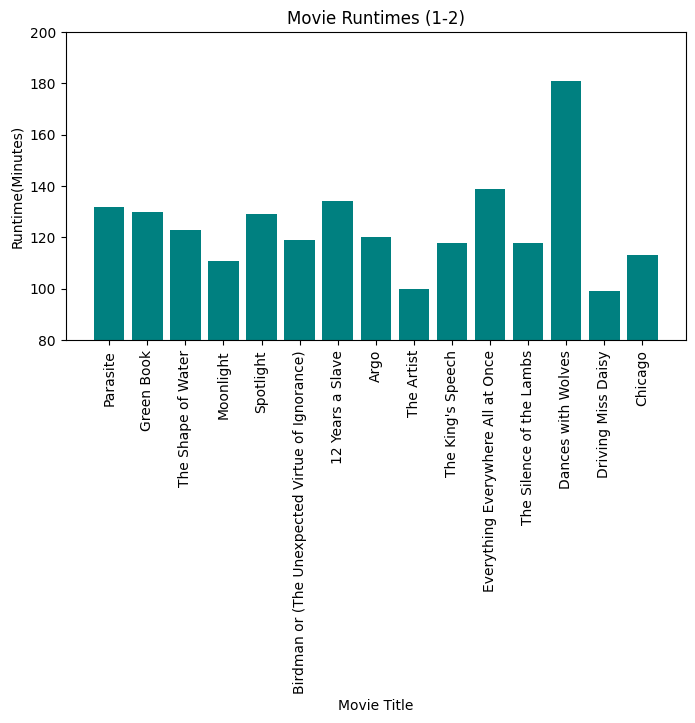

In [7]:
plt.figure(figsize = [8, 4])
plt.xticks(rotation = 90)
plt.bar(movie['Movie Title'], movie['Runtime'], color = 'teal')

plt.title('Movie Runtimes (1-2)')
plt.xlabel('Movie Title')
plt.ylabel('Runtime(Minutes)')
plt.ylim((80, 200))

plt.show()

### 2.What movie had the longest runtime?

### 3.Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

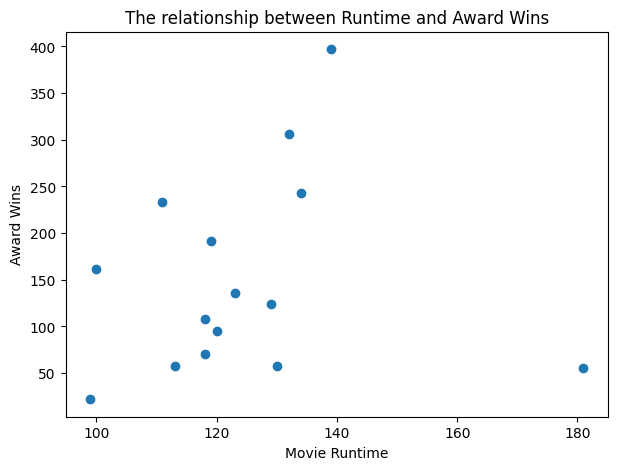

In [8]:
plt.figure(figsize = [7, 5])
plt.scatter(movie['Runtime'], movie['Award Wins'])
plt.title('The relationship between Runtime and Award Wins')
plt.xlabel('Movie Runtime')
plt.ylabel('Award Wins')
plt.show()

### 4.(Graph) How many awards and nominations did each movie receive?

Text(0.5, 1.0, 'Number of Award Wins and Award Nominations Each Movie Won')

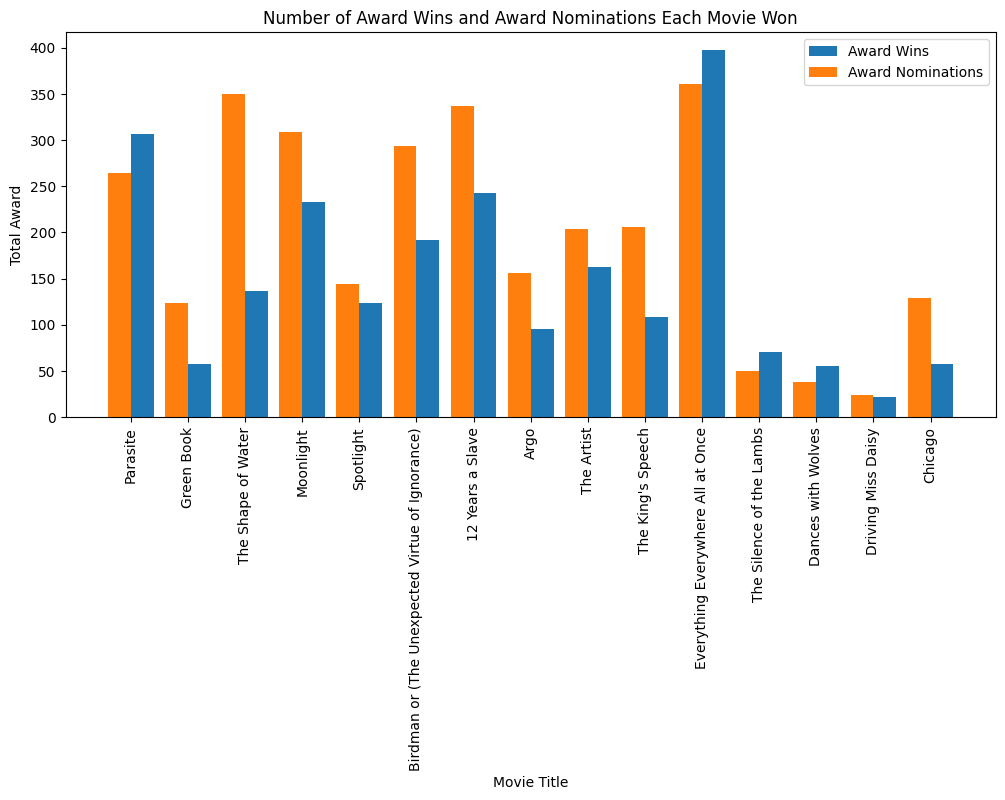

In [23]:
plt.figure(figsize = [12, 5])
plt.xticks(rotation = 90)

X_axis = np.arange(len(movie['Movie Title']))
plt.bar(X_axis + 0.2, movie['Award Wins'], 0.40, label="Award Wins")
plt.bar(X_axis - 0.2, movie['Award Nominations'], 0.40, label="Award Nominations")
plt.xticks(X_axis, movie['Movie Title'])
plt.legend()
plt.ylabel('Total Award')
plt.xlabel('Movie Title')
plt.title('Number of Award Wins and Award Nominations Each Movie Won')

As you can see, 'Everything Everywhere All at Once' have the most award with above 350 award both Award Wins and Award Nominations

## Extra Credit
### 1.Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?


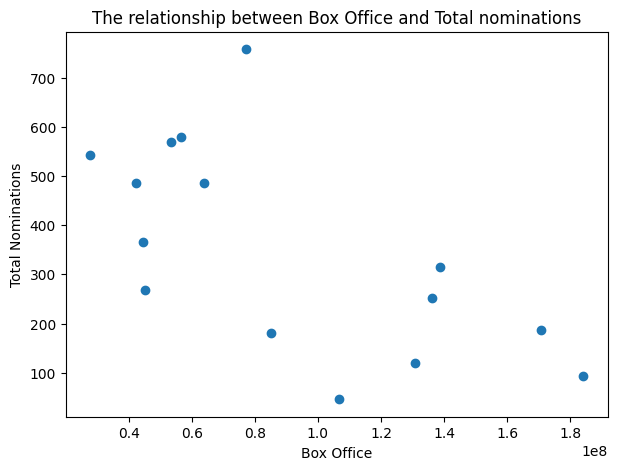

In [10]:
plt.figure(figsize = [7, 5])
plt.scatter(movie['Box Office'], movie['Award Wins'] + movie['Award Nominations'])
plt.title('The relationship between Box Office and Total nominations')
plt.xlabel('Box Office')
plt.ylabel('Total Nominations')
plt.show()

### 2.Is there a relationship between box office earnings and movie runtime?

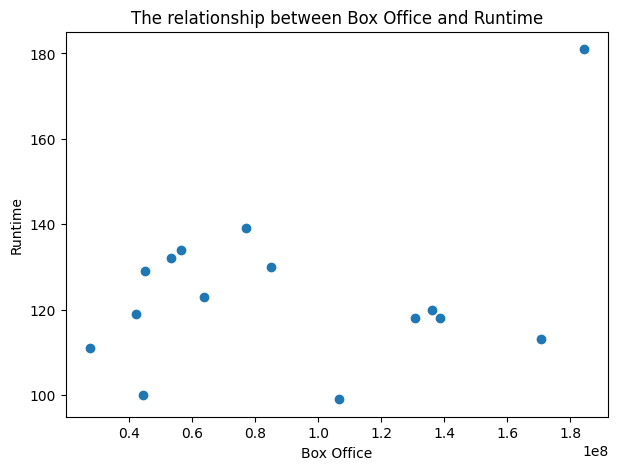

In [11]:
plt.figure(figsize = [7,5])
plt.scatter(movie['Box Office'], movie['Runtime'])
plt.title('The relationship between Box Office and Runtime')
plt.xlabel('Box Office')
plt.ylabel('Runtime')
plt.show()

### 3.(Graph) How much did each movie earn at the box office?

Text(0, 0.5, 'Box Office Earnings')

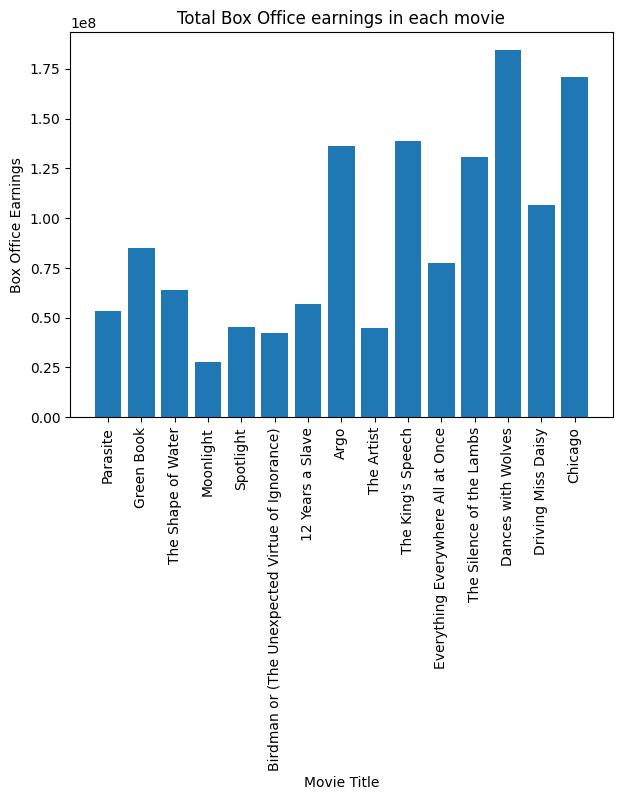

In [12]:
plt.figure(figsize = [7, 5])
plt.xticks(rotation = 90)
plt.bar(movie['Movie Title'], movie['Box Office'])
plt.title('Total Box Office earnings in each movie')
plt.xlabel('Movie Title')
plt.ylabel('Box Office Earnings')